## 패키지 import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
rating_df = pd.read_csv('./u.data', sep = '\t')
rating_df.columns = ['user_id', 'item_id', 'rating', 'timestamp']
rating_df.head()

,user_id,item_id,rating,timestamp
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [5]:
movie_info_df = pd.read_csv('./u.item', sep = '|',encoding='latin1')
# pd.read_csv('./u.data', sep = '\t')
movie_info_df.columns = ['movie_id' , 'movie_title' , 'release_date' , 'video_release_date' ,
              'IMDb_URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              'Children' , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western']
movie_info_df.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
user_info_df = pd.read_csv('./u.user', sep = '|',encoding='latin1' )
user_info_df.columns = ['user_id' , 'age' , 'gender' , 'occupation' , 'zip_code']
user_info_df.head()

,user_id,age,gender,occupation,zip_code
0,2,53,F,other,94043
1,3,23,M,writer,32067
2,4,24,M,technician,43537
3,5,33,F,other,15213
4,6,42,M,executive,98101


## 내 또래들이 가장 좋아하는 영화

-> 20~30 대 찾기

In [10]:
## 2-30대가 평가자 찾기

fri_movies_index = user_info_df[(user_info_df['age'] >= 20) & (user_info_df['age'] < 40)]['user_id']
fri_movies_index

1        3
2        4
3        5
6        8
7        9
      ... 
936    938
937    939
938    940
939    941
941    943
Name: user_id, Length: 572, dtype: int64

In [17]:
# 2-30대가 평가한 영화 찾기

fri_rating_df = rating_df[rating_df['user_id'].isin(fri_movies_index)]
sorted_fri_df = fri_rating_df.sort_values('rating', ascending=False)
sorted_fri_df

,user_id,item_id,rating,timestamp
50758,391,603,5,877398991
83034,342,182,5,875319173
31618,472,561,5,875982050
31616,357,151,5,878951728
83017,417,151,5,879646463
...,...,...,...,...
20328,363,557,1,891496103
55616,708,412,1,877326159
89009,608,509,1,880403855
20370,430,253,1,877225484


In [28]:
# 찾은 영화중 top 10 정도 찾기 

avg_movie_rating = sorted_fri_df.groupby('item_id').mean().sort_values('rating', ascending = False)
top_movies = avg_movie_rating[avg_movie_rating['rating'] >= 4.8] 
top_movies

,user_id,rating,timestamp
item_id,,,
119,344.0,5.0,884814457.0
1293,519.0,5.0,883250148.0
1653,675.0,5.0,889489913.0
1500,530.0,5.0,877470354.5
1064,659.0,5.0,891385866.0
1599,437.0,5.0,880142614.0
850,58.0,5.0,884305150.0
1536,385.0,5.0,879441339.0
1189,474.0,5.0,892867735.5


In [31]:
# 탑에속한 영화의 info 출력

movie_info_df[movie_info_df['movie_id'].isin(top_movies.index)]

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
117,119,Maya Lin: A Strong Clear Vision (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Maya%20Lin:%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,850,"Perfect Candidate, A (1996)",27-Sep-1996,NaN,http://us.imdb.com/M/title-exact?Perfect%20Can...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1062,1064,Crossfire (1947),01-Jan-1947,NaN,http://us.imdb.com/M/title-exact?Crossfire%20(...,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1187,1189,Prefontaine (1997),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Prefontaine%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1291,1293,Star Kid (1997),16-Jan-1998,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0
1465,1467,"Saint of Fort Washington, The (1993)",01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Saint%20of%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,1500,Santa with Muscles (1996),08-Nov-1996,NaN,http://us.imdb.com/M/title-exact?Santa%20with%...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1514,1516,"Wedding Gift, The (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Wedding%20Gif...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1534,1536,Aiqing wansui (1994),22-Jul-1996,NaN,http://us.imdb.com/M/title-exact?Aiqing%20Wans...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1597,1599,Someone Else's America (1995),10-May-1996,NaN,http://us.imdb.com/M/title-exact?Someone%20Els...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 10년전 오늘 가장 핫했던 영화

--> movie_info_df 를 이용하여 10년전 오늘 개봉된 영화를 찾아보자 

In [41]:
ten_years_df = movie_info_df.copy()

In [42]:
ten_years_df['date'] = pd.DatetimeIndex(ten_years_df['release_date']).year
ten_years_df.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,date
0,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
1,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
2,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995.0
3,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995.0


In [49]:
ten_years_df.sort_values('date', ascending=False)

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,date
1291,1293,Star Kid (1997),16-Jan-1998,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1998.0
1647,1649,"Big One, The (1997)",27-Mar-1998,NaN,"http://us.imdb.com/Title?Big+One,+The+(1997)",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998.0
750,752,"Replacement Killers, The (1998)",06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Replacement+K...,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1998.0
348,350,Fallen (1998),16-Jan-1998,NaN,http://us.imdb.com/Title?Fallen+(1998),0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1998.0
1432,1434,Shooting Fish (1997),16-Jan-1998,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,656,M (1931),01-Jan-1931,NaN,http://us.imdb.com/M/title-exact?M%20(1931),0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1931.0
615,617,"Blue Angel, The (Blaue Engel, Der) (1930)",01-Jan-1930,NaN,http://us.imdb.com/M/title-exact?Blaue%20Engel...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1930.0
1540,1542,"Scarlet Letter, The (1926)",01-Jan-1926,NaN,http://us.imdb.com/M/title-exact?Scarlet%20Let...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1926.0
673,675,"Nosferatu (Nosferatu, eine Symphonie des Graue...",01-Jan-1922,NaN,"http://us.imdb.com/M/title-exact?Nosferatu,%20...",0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1922.0


In [52]:
rating_df

,user_id,item_id,rating,timestamp
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806
...,...,...,...,...
99994,880,476,3,880175444
99995,716,204,5,879795543
99996,276,1090,1,874795795
99997,13,225,2,882399156


In [54]:
## 1993년에 개봉된 영화 찾기

ten_movies_id = ten_years_df[ten_years_df['date'] == 1993]['movie_id']
rating_ten = rating_df[rating_df['item_id'].isin(ten_movies_id.values)]
rating_ten

,user_id,item_id,rating,timestamp
8,6,86,3,883603013
15,122,387,5,879270459
19,119,392,4,886176814
32,290,88,4,880731963
94,119,1153,5,874781198
...,...,...,...,...
99960,766,91,5,891310125
99978,943,391,2,888640291
99984,617,582,4,883789294
99993,378,78,3,880056976


In [61]:
## 개봉 영화의 평점 확인하기

sorted_ten = rating_ten.groupby('item_id').mean().sort_values('rating', ascending=False)
top_ten =  sorted_ten[sorted_ten['rating'] >= 4]
display(top_ten)
print(top_ten.index)

,user_id,rating,timestamp
item_id,,,
1467,565.000000,5.000000,8.783198e+08
318,469.714765,4.466443,8.834050e+08
169,454.483051,4.466102,8.828888e+08
963,467.609756,4.292683,8.823634e+08
83,472.914773,4.062500,8.834808e+08
79,454.187500,4.044643,8.830998e+08
60,476.000000,4.015625,8.831114e+08
1533,381.000000,4.000000,8.926961e+08
701,417.300000,4.000000,8.843438e+08


Int64Index([1467, 318, 169, 963, 83, 79, 60, 1533, 701], dtype='int64', name='item_id')


In [60]:
## 이중 top 10만 확인하자

ten_years_df[ten_years_df['movie_id'].isin(top_ten.index)]

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,date
58,60,Three Colors: Blue (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1993.0
77,79,"Fugitive, The (1993)",01-Jan-1993,NaN,"http://us.imdb.com/M/title-exact?Fugitive,%20T...",0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1993.0
81,83,Much Ado About Nothing (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Much%20Ado%20...,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1993.0
167,169,"Wrong Trousers, The (1993)",01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Wrong%20Trous...,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1993.0
316,318,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1993.0
699,701,"Wonderful, Horrible Life of Leni Riefenstahl, ...",01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Macht%20der%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1993.0
961,963,Some Folks Call It a Sling Blade (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Some%20Folks%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1993.0
1465,1467,"Saint of Fort Washington, The (1993)",01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Saint%20of%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1993.0
1531,1533,I Don't Want to Talk About It (De eso no se ha...,01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?De%20Eso%20No...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1993.0


#### 남자/여자를 위한 영화

1. 남자들이 투표한 영화 셀렉
2. 평균이 높은 영화 셀렉
3. 가시화  
여자의 경우 반복

In [68]:
rated_male_id = user_info_df[user_info_df['gender'] == 'M']
rated_male_id

,user_id,age,gender,occupation,zip_code
1,3,23,M,writer,32067
2,4,24,M,technician,43537
4,6,42,M,executive,98101
5,7,57,M,administrator,91344
6,8,36,M,administrator,05201
...,...,...,...,...,...
934,936,24,M,other,32789
935,937,48,M,educator,98072
938,940,32,M,administrator,02215
939,941,20,M,student,97229


In [69]:
rating_male = rating_df[rating_df['user_id'].isin(rated_male_id['user_id'])]
rating_male

,user_id,item_id,rating,timestamp
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806
5,115,265,2,881171488
...,...,...,...,...
99992,913,209,2,881367150
99993,378,78,3,880056976
99994,880,476,3,880175444
99996,276,1090,1,874795795


In [71]:
## 평점 평균이 높은 영화 고르기
rating_male_avg = rating_male.groupby('item_id').mean().sort_values('rating', ascending=False)
top_rating_male_avg = rating_male_avg[rating_male_avg['rating'] == 5]
top_rating_male_avg

,user_id,rating,timestamp
item_id,,,
1605,901.000000,5.0,8.771271e+08
1612,504.000000,5.0,8.873484e+08
1201,90.000000,5.0,8.913837e+08
1191,440.000000,5.0,8.915504e+08
1189,309.500000,5.0,8.861998e+08
1175,220.500000,5.0,8.795287e+08
814,13.000000,5.0,8.863023e+08
1144,69.000000,5.0,8.821262e+08
1656,883.000000,5.0,8.916922e+08


In [72]:
movie_info_df[movie_info_df['movie_id'].isin(top_rating_male_avg.indexb)]

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
812,814,"Great Day in Harlem, A (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Great%20Day%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1120,1122,They Made Me a Criminal (1939),01-Jan-1939,NaN,http://us.imdb.com/M/title-exact?They%20Made%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1142,1144,"Quiet Room, The (1996)",02-May-1997,NaN,http://us.imdb.com/M/title-exact?Quiet%20Room%...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1173,1175,Hugo Pool (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Hugo+Pool+(1997),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1187,1189,Prefontaine (1997),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Prefontaine%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1189,1191,"Letter From Death Row, A (1998)",01-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Letter+From+D...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1199,1201,Marlene Dietrich: Shadow and Light (1996),02-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Marlene%20Die...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1291,1293,Star Kid (1997),16-Jan-1998,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0
1304,1306,Delta of Venus (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Delta%20of%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1465,1467,"Saint of Fort Washington, The (1993)",01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Saint%20of%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
## 여자의 경우

rated_female_id = user_info_df[user_info_df['gender'] == 'F']

rating_female = rating_df[rating_df['user_id'].isin(rated_female_id['user_id'])]

rating_female_avg = rating_female.groupby('item_id').mean().sort_values('rating', ascending=False)
top_rating_female_avg = rating_female_avg[rating_female_avg['rating'] == 5]

movie_info_df[movie_info_df['movie_id'].isin(top_rating_female_avg.index)]

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
72,74,Faster Pussycat! Kill! Kill! (1965),01-Jan-1965,NaN,http://us.imdb.com/M/title-exact?Faster%20Puss...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,119,Maya Lin: A Strong Clear Vision (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Maya%20Lin:%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
881,883,Telling Lies in America (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Telling+Lies+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
882,884,Year of the Horse (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Year+of+the+H...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1187,1189,Prefontaine (1997),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Prefontaine%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1299,1301,Stripes (1981),01-Jan-1981,NaN,http://us.imdb.com/M/title-exact?Stripes+(1981),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1366,1368,Mina Tannenbaum (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Mina%20Tannen...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1449,1451,Foreign Correspondent (1940),01-Jan-1940,NaN,http://us.imdb.com/M/title-exact?Foreign%20Cor...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1470,1472,"Visitors, The (Visiteurs, Les) (1993)",19-Jul-1996,NaN,"http://us.imdb.com/M/title-exact?Visiteurs,%20...",0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1592,1594,Everest (1998),10-Mar-1998,NaN,http://us.imdb.com/Title?Everest+(1998),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 한 여름 당신을 시원하게 할 영화

1. 스릴러( 'Mystery', 'Horror', 'Crime', 'Thriller', 'Action')
2. 여름 시즌의 개봉작


In [114]:
summer_re_movie = movie_info_df.copy()

In [116]:
summer_re_movie['month'] = pd.DatetimeIndex(summer_re_movie['release_date']).month
summer_re_movie.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,month
0,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1.0
1,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.0
2,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.0
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [119]:
# 여름 7-8월/ 장르 'Mystery', 'Horror', 'Crime', 'Thriller', 'Action'

summer_re_movies = summer_re_movie[(summer_re_movie['Mystery'] == 1) | (summer_re_movie['Horror'] == 1) | (summer_re_movie['Crime'] == 1) | (summer_re_movie['Thriller'] == 1) |  (summer_re_movie['Action'] == 1) | (summer_re_movie['month'] == 7) | (summer_re_movie['month'] == 8) ]
summer_re_movies

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,month
0,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1.0
1,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.0
2,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.0
9,11,Seven (Se7en) (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Se7en%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,1660,Small Faces (1995),09-Aug-1996,NaN,http://us.imdb.com/M/title-exact?Small%20Faces...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.0
1667,1669,MURDER and murder (1996),20-Jun-1997,NaN,http://us.imdb.com/M/title-exact?MURDER+and+mu...,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,6.0
1668,1670,Tainted (1998),01-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Tainted+(1998),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2.0
1671,1673,Mirage (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Mirage%20(1995),0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1.0


In [120]:
rating_df.head()

,user_id,item_id,rating,timestamp
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [122]:
rating_summer_movies = rating_df[rating_df['item_id'].isin(summer_re_movies['movie_id'])]
rating_summer_movies

,user_id,item_id,rating,timestamp
0,186,302,3,891717742
3,166,346,1,886397596
5,115,265,2,881171488
9,62,257,2,879372434
11,200,222,5,876042340
...,...,...,...,...
99983,654,370,2,887863914
99986,660,229,2,891406212
99987,421,498,4,892241344
99991,721,262,3,877137285


In [126]:
summer_movies_ids = rating_summer_movies.groupby('item_id').mean().sort_values('rating', ascending=False)[:10].index
summer_movies_ids

Int64Index([1536, 1122, 408, 603, 12, 50, 513, 1191, 963, 98], dtype='int64', name='item_id')

In [127]:
movie_info_df[movie_info_df['movie_id'].isin(summer_movies_ids)]

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
10,12,"Usual Suspects, The (1995)",14-Aug-1995,NaN,http://us.imdb.com/M/title-exact?Usual%20Suspe...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48,50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,...,0,0,0,0,0,1,1,0,1,0
96,98,"Silence of the Lambs, The (1991)",01-Jan-1991,NaN,http://us.imdb.com/M/title-exact?Silence%20of%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
406,408,"Close Shave, A (1995)",28-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
511,513,"Third Man, The (1949)",01-Jan-1949,NaN,"http://us.imdb.com/M/title-exact?Third%20Man,%...",0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
601,603,Rear Window (1954),01-Jan-1954,NaN,http://us.imdb.com/M/title-exact?Rear%20Window...,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
961,963,Some Folks Call It a Sling Blade (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Some%20Folks%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1120,1122,They Made Me a Criminal (1939),01-Jan-1939,NaN,http://us.imdb.com/M/title-exact?They%20Made%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1189,1191,"Letter From Death Row, A (1998)",01-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Letter+From+D...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1534,1536,Aiqing wansui (1994),22-Jul-1996,NaN,http://us.imdb.com/M/title-exact?Aiqing%20Wans...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 아는 사람만 아는 숨겨진 명작 (평가자는 적지만 평점이 높은 경우)



In [135]:
rating_df.user_id.nunique()

# 평가자가 총 943명 => 100~200명이 평가한걸로 하자.

943

In [138]:
rating_df.item_id.value_counts()

# 평가된 수 너무 적으면 의미가 없고, 너무 많지도 않은 적당수.. 

count_movie_num = rating_df.item_id.value_counts()
count_movie_num

50      583
258     509
100     508
181     507
294     485
       ... 
852       1
1505      1
1653      1
1452      1
1641      1
Name: item_id, Length: 1682, dtype: int64

In [146]:
hidden_movies_s = count_movie_num[(count_movie_num.values >= 100) & (count_movie_num.values <= 200)]
hidden_movies_s


208     200
230     199
134     198
272     198
250     197
       ... 
404     101
381     100
1012    100
682     100
665     100
Name: item_id, Length: 221, dtype: int64

In [158]:
hidden_movies_df = rating_df[rating_df['item_id'].isin(hidden_movies_s.index)].groupby('item_id').mean()\
                                .sort_values('rating', ascending=False)

hidden_movies_df

,user_id,rating,timestamp
item_id,,,
408,443.142857,4.491071,8.823304e+08
169,454.483051,4.466102,8.828888e+08
178,453.552000,4.344000,8.828963e+08
134,466.853535,4.292929,8.833150e+08
480,464.821229,4.284916,8.833232e+08
...,...,...,...
358,496.097902,2.615385,8.836746e+08
260,462.204724,2.574803,8.842682e+08
325,443.171875,2.546875,8.831109e+08


In [159]:
hidden_movies_ids = hidden_movies_df[:20].index
movie_info_df[movie_info_df['movie_id'].isin(hidden_movies_ids)]

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
132,134,Citizen Kane (1941),01-Jan-1941,NaN,http://us.imdb.com/M/title-exact?Citizen%20Kan...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,169,"Wrong Trousers, The (1993)",01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Wrong%20Trous...,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
168,170,Cinema Paradiso (1988),01-Jan-1988,NaN,http://us.imdb.com/M/title-exact?Nuovo%20cinem...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
176,178,12 Angry Men (1957),01-Jan-1957,NaN,http://us.imdb.com/M/title-exact?12%20Angry%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188,190,Henry V (1989),01-Jan-1989,NaN,http://us.imdb.com/M/title-exact?Henry%20V%20(...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
197,199,"Bridge on the River Kwai, The (1957)",01-Jan-1957,NaN,http://us.imdb.com/M/title-exact?Bridge%20on%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
221,223,Sling Blade (1996),22-Nov-1996,NaN,http://us.imdb.com/M/title-exact?Sling%20Blade...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
270,272,Good Will Hunting (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283,285,Secrets & Lies (1996),04-Oct-1996,NaN,http://us.imdb.com/M/title-exact?Secrets%20&%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
314,316,As Good As It Gets (1997),23-Dec-1997,NaN,http://us.imdb.com/Title?As+Good+As+It+Gets+(1...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 지식 기반의 추천

- 가장 영화를 많이 본 20명을 전문가라고 가정하여 전문가의 추천  
단, 5명이상이 봤다고 가정하자.

In [75]:
rating_df.user_id.value_counts()

405    737
655    685
13     636
450    540
276    518
      ... 
475     20
242     20
866     20
309     20
19      20
Name: user_id, Length: 943, dtype: int64

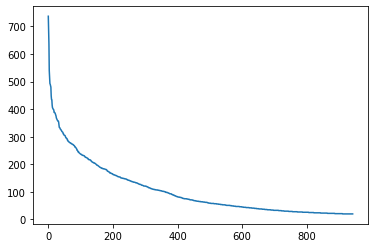

In [77]:
plt.plot(rating_df.user_id.value_counts().values)

In [80]:
# 평론가

critics = rating_df.user_id.value_counts()[:20].index
critics


Int64Index([405, 655,  13, 450, 276, 416, 537, 303, 234, 393, 181, 279, 429,
            846,   7,  94, 682, 308,  92, 293],
           dtype='int64')

In [82]:
critics_rating_df = rating_df[rating_df['user_id'].isin(critics)]
critics_rating_df

,user_id,item_id,rating,timestamp
14,303,785,3,879485318
18,234,1184,2,892079237
23,308,1,4,887736532
35,181,1081,1,878962623
37,276,796,1,874791932
...,...,...,...,...
99962,429,199,5,882386006
99974,537,443,3,886031752
99981,279,64,1,875308510
99996,276,1090,1,874795795


In [87]:
## 5 명 이상이 본 영화만 필터링

count_movie_df = critics_rating_df.groupby('item_id').count()['rating'].sort_values(ascending=False)
count_movie_df

item_id
288     20
96      19
172     19
79      19
56      19
        ..
1363     1
1362     1
1360     1
1358     1
1655     1
Name: rating, Length: 1556, dtype: int64

In [90]:
target_movie_ids = count_movie_df[count_movie_df >= 5].index 
target_movie_ids

## 평론가가 최소 5명이 평가한 영화

Int64Index([ 288,   96,  172,   79,   56,   50,  210,   28,  204,   22,
            ...
            1168, 1182,  573,  299,  345, 1232,  948, 1042,  969, 1098],
           dtype='int64', name='item_id', length=786)

In [95]:
critics_rating_df[critics_rating_df['item_id'].isin(target_movie_ids)]\
                                    .groupby('item_id')\
                                    .mean()\
                                    .sort_values('rating', ascending=False)



,user_id,rating,timestamp
item_id,,,
127,371.750000,4.812500,8.857623e+08
50,353.263158,4.736842,8.861888e+08
474,313.769231,4.615385,8.860025e+08
484,319.454545,4.545455,8.866752e+08
187,367.933333,4.533333,8.860297e+08
...,...,...,...
1095,254.000000,1.500000,8.827746e+08
1239,417.000000,1.500000,8.831221e+08
375,389.000000,1.333333,8.832906e+08
